In [49]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Checking the Access to the GPU

In [50]:
!nvidia-smi

Thu Mar 16 09:31:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Creating a Helper Variable

In [51]:
#importing os to create a helper variable, which allows us to easily manages different paths in the code
import os

HOME = os.getcwd()

print(HOME)

/content/drive/MyDrive/TrafficSignDetection/datasets


In [52]:
HOME = '/content/drive/MyDrive/TrafficSignDetection'

##Installing the YOLOv7


In [53]:
##Clonning the Github Repo
%cd '/content/drive/MyDrive/TrafficSignDetection'
!git clone https://github.com/ultralytics/ultralytics.git


/content/drive/MyDrive/TrafficSignDetection
fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [54]:
%cd {HOME}/ultralytics

/content/drive/MyDrive/TrafficSignDetection/ultralytics


In [55]:
!pip install -e '.[dev]'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/TrafficSignDetection/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.53
    Can't uninstall 'ultralytics'. No files were found to uninstall.
  Running setup.py develop for ultralytics


In [62]:
from IPython import display
display.clear_output()
!yolo mode=checks
     

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.0/78.2 GB disk)


##Importing Dataset from Roboflow

In [63]:
!mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content/drive/MyDrive/TrafficSignDetection/datasets’: File exists


In [64]:
%cd {HOME}

/content/drive/MyDrive/TrafficSignDetection


In [65]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DQT8Y7PRUE8KahfsdfYr")
project = rf.workspace("joy-timmermans-student-pxl-be").project("road-signs-uxowq")
datasets = project.version(6).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Road-signs-6 in yolov5pytorch:: 100%|██████████| 2092/2092 [00:14<00:00, 140.41it/s]


##Training the YOLOv8 Model on Custom Dataset

In [66]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800


/content/drive/MyDrive/TrafficSignDetection
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/TrafficSignDetection/Road-signs-6/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True

##Checking the Files in the Training Directory

In [67]:
!ls {HOME}/runs/detect/train/


ls: cannot access '/content/drive/MyDrive/TrafficSignDetection/runs/detect/train/': No such file or directory


##Printing the Confusion Matrix

In [ ]:

from IPython.display import Image

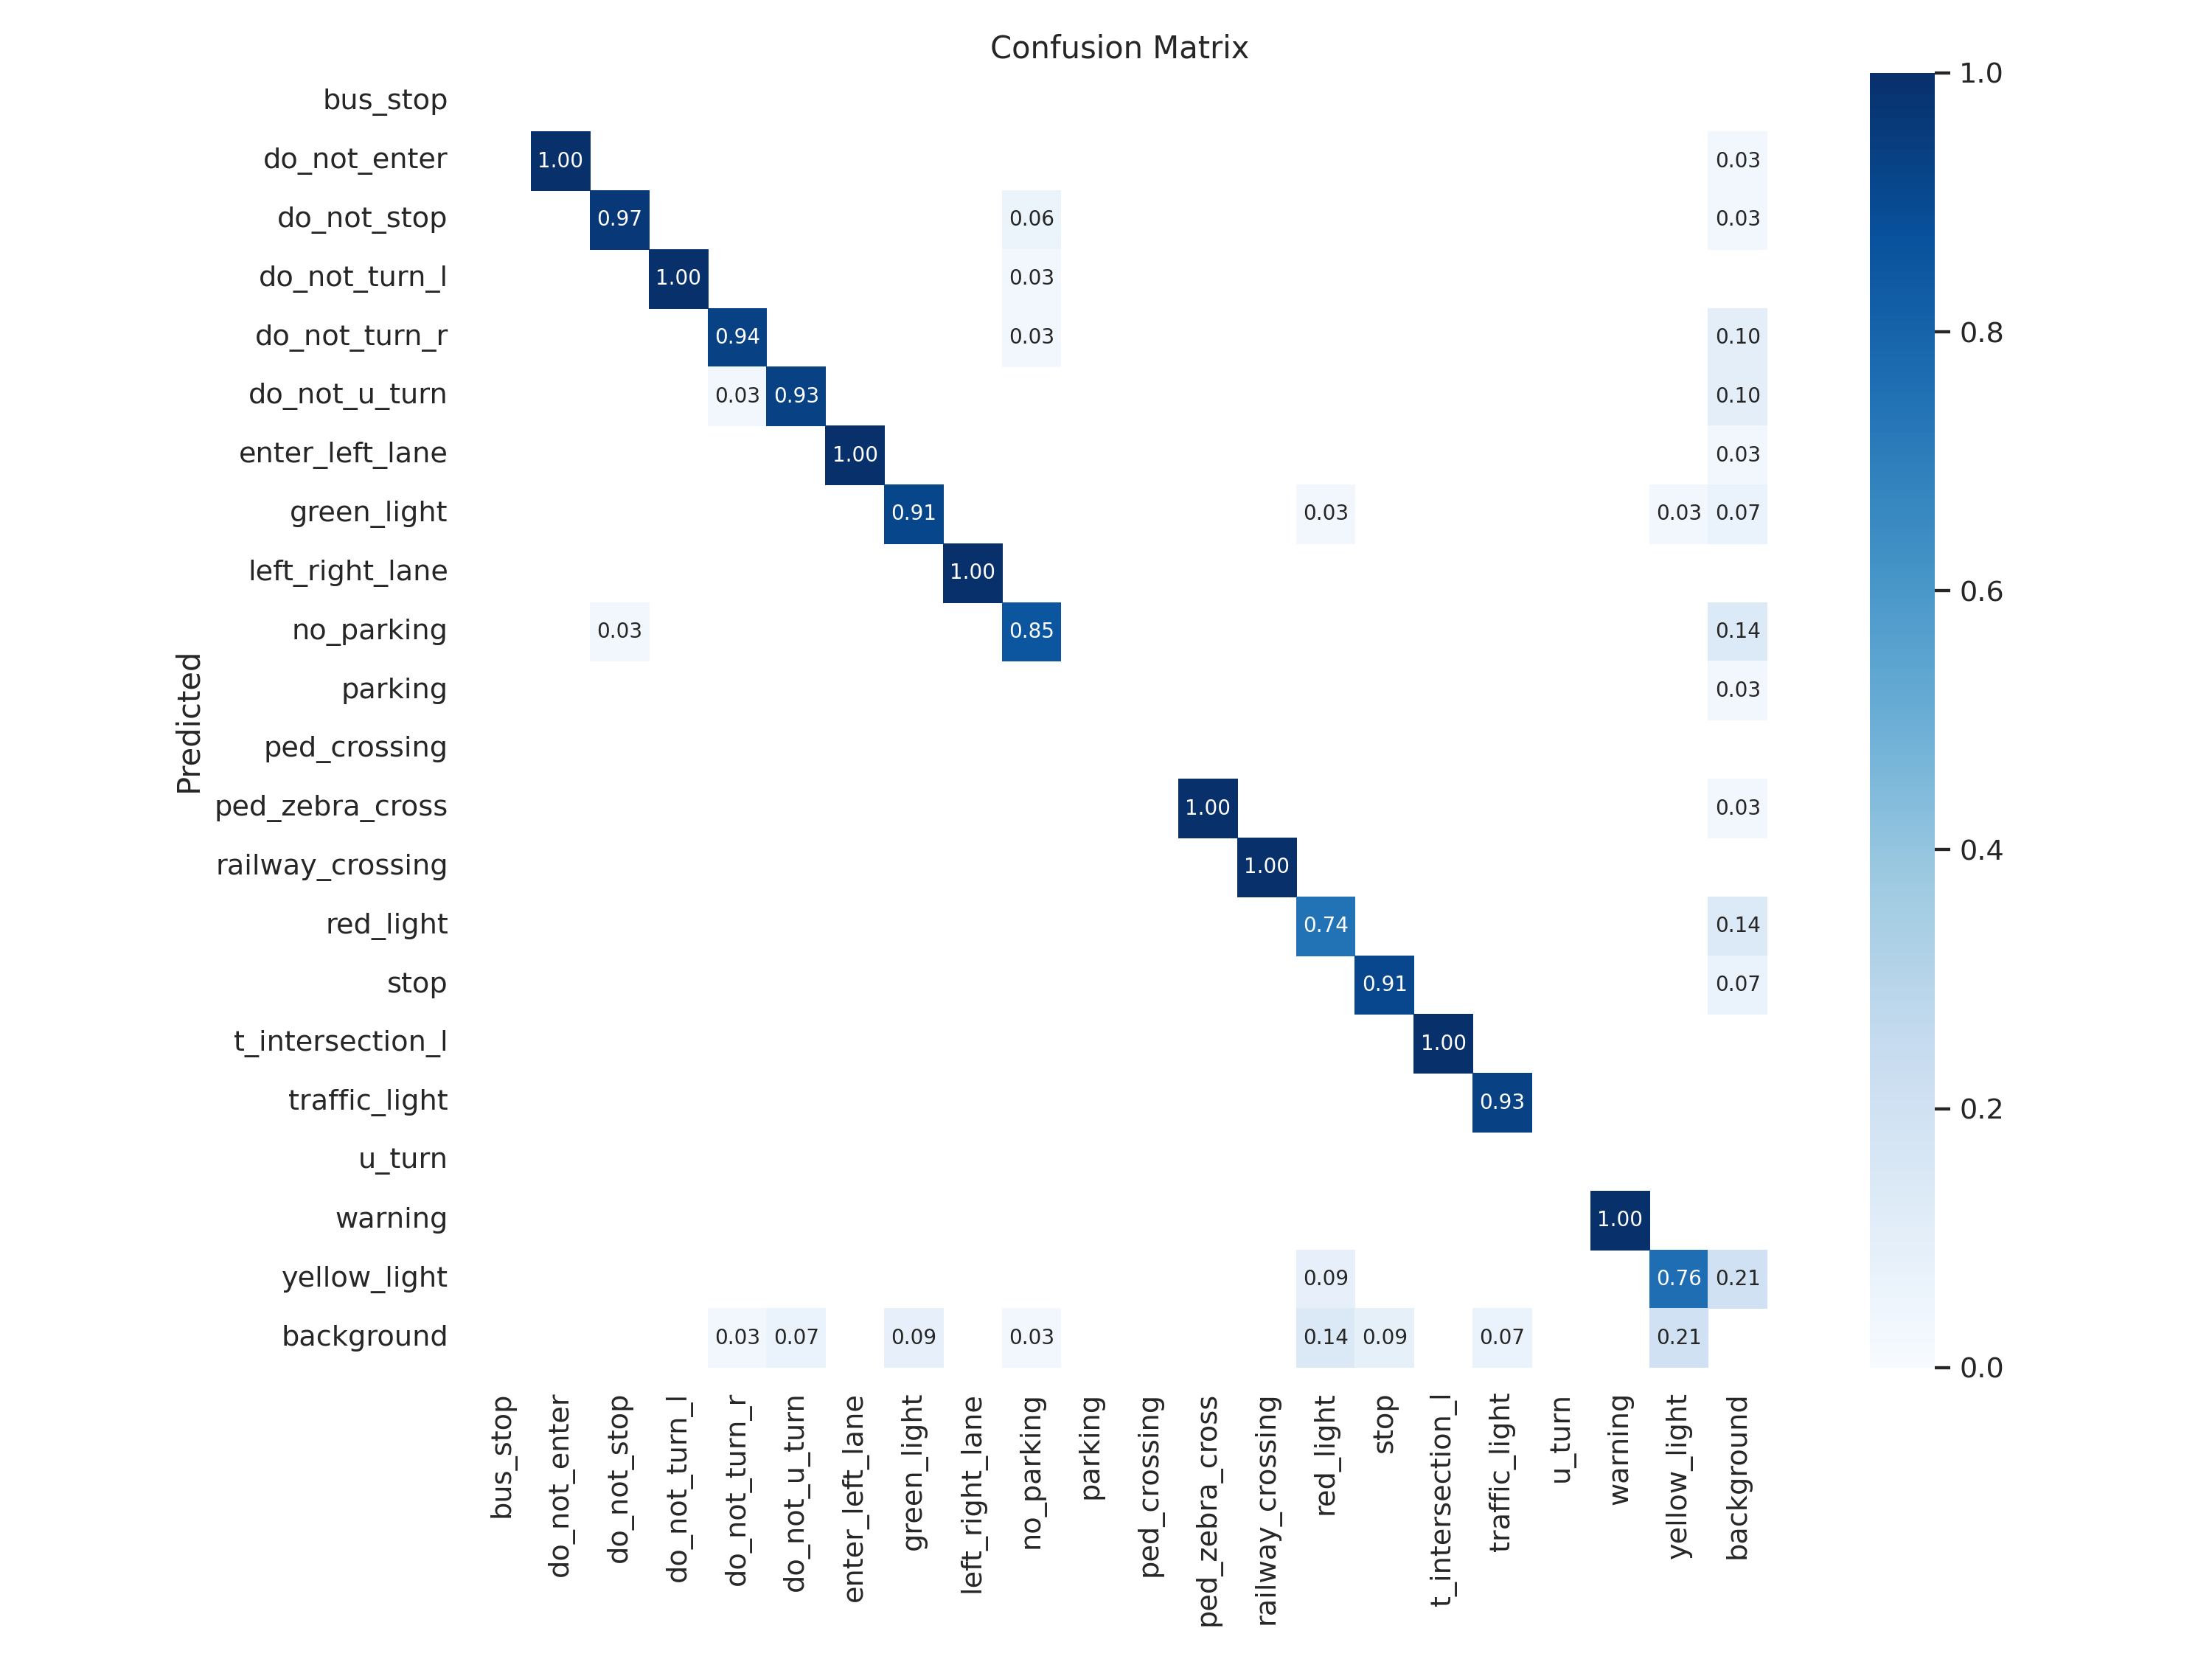

In [ ]:
Image(filename = "runs/detect/train/confusion_matrix.png")

##Checking the Model Prediction on Validation Batch

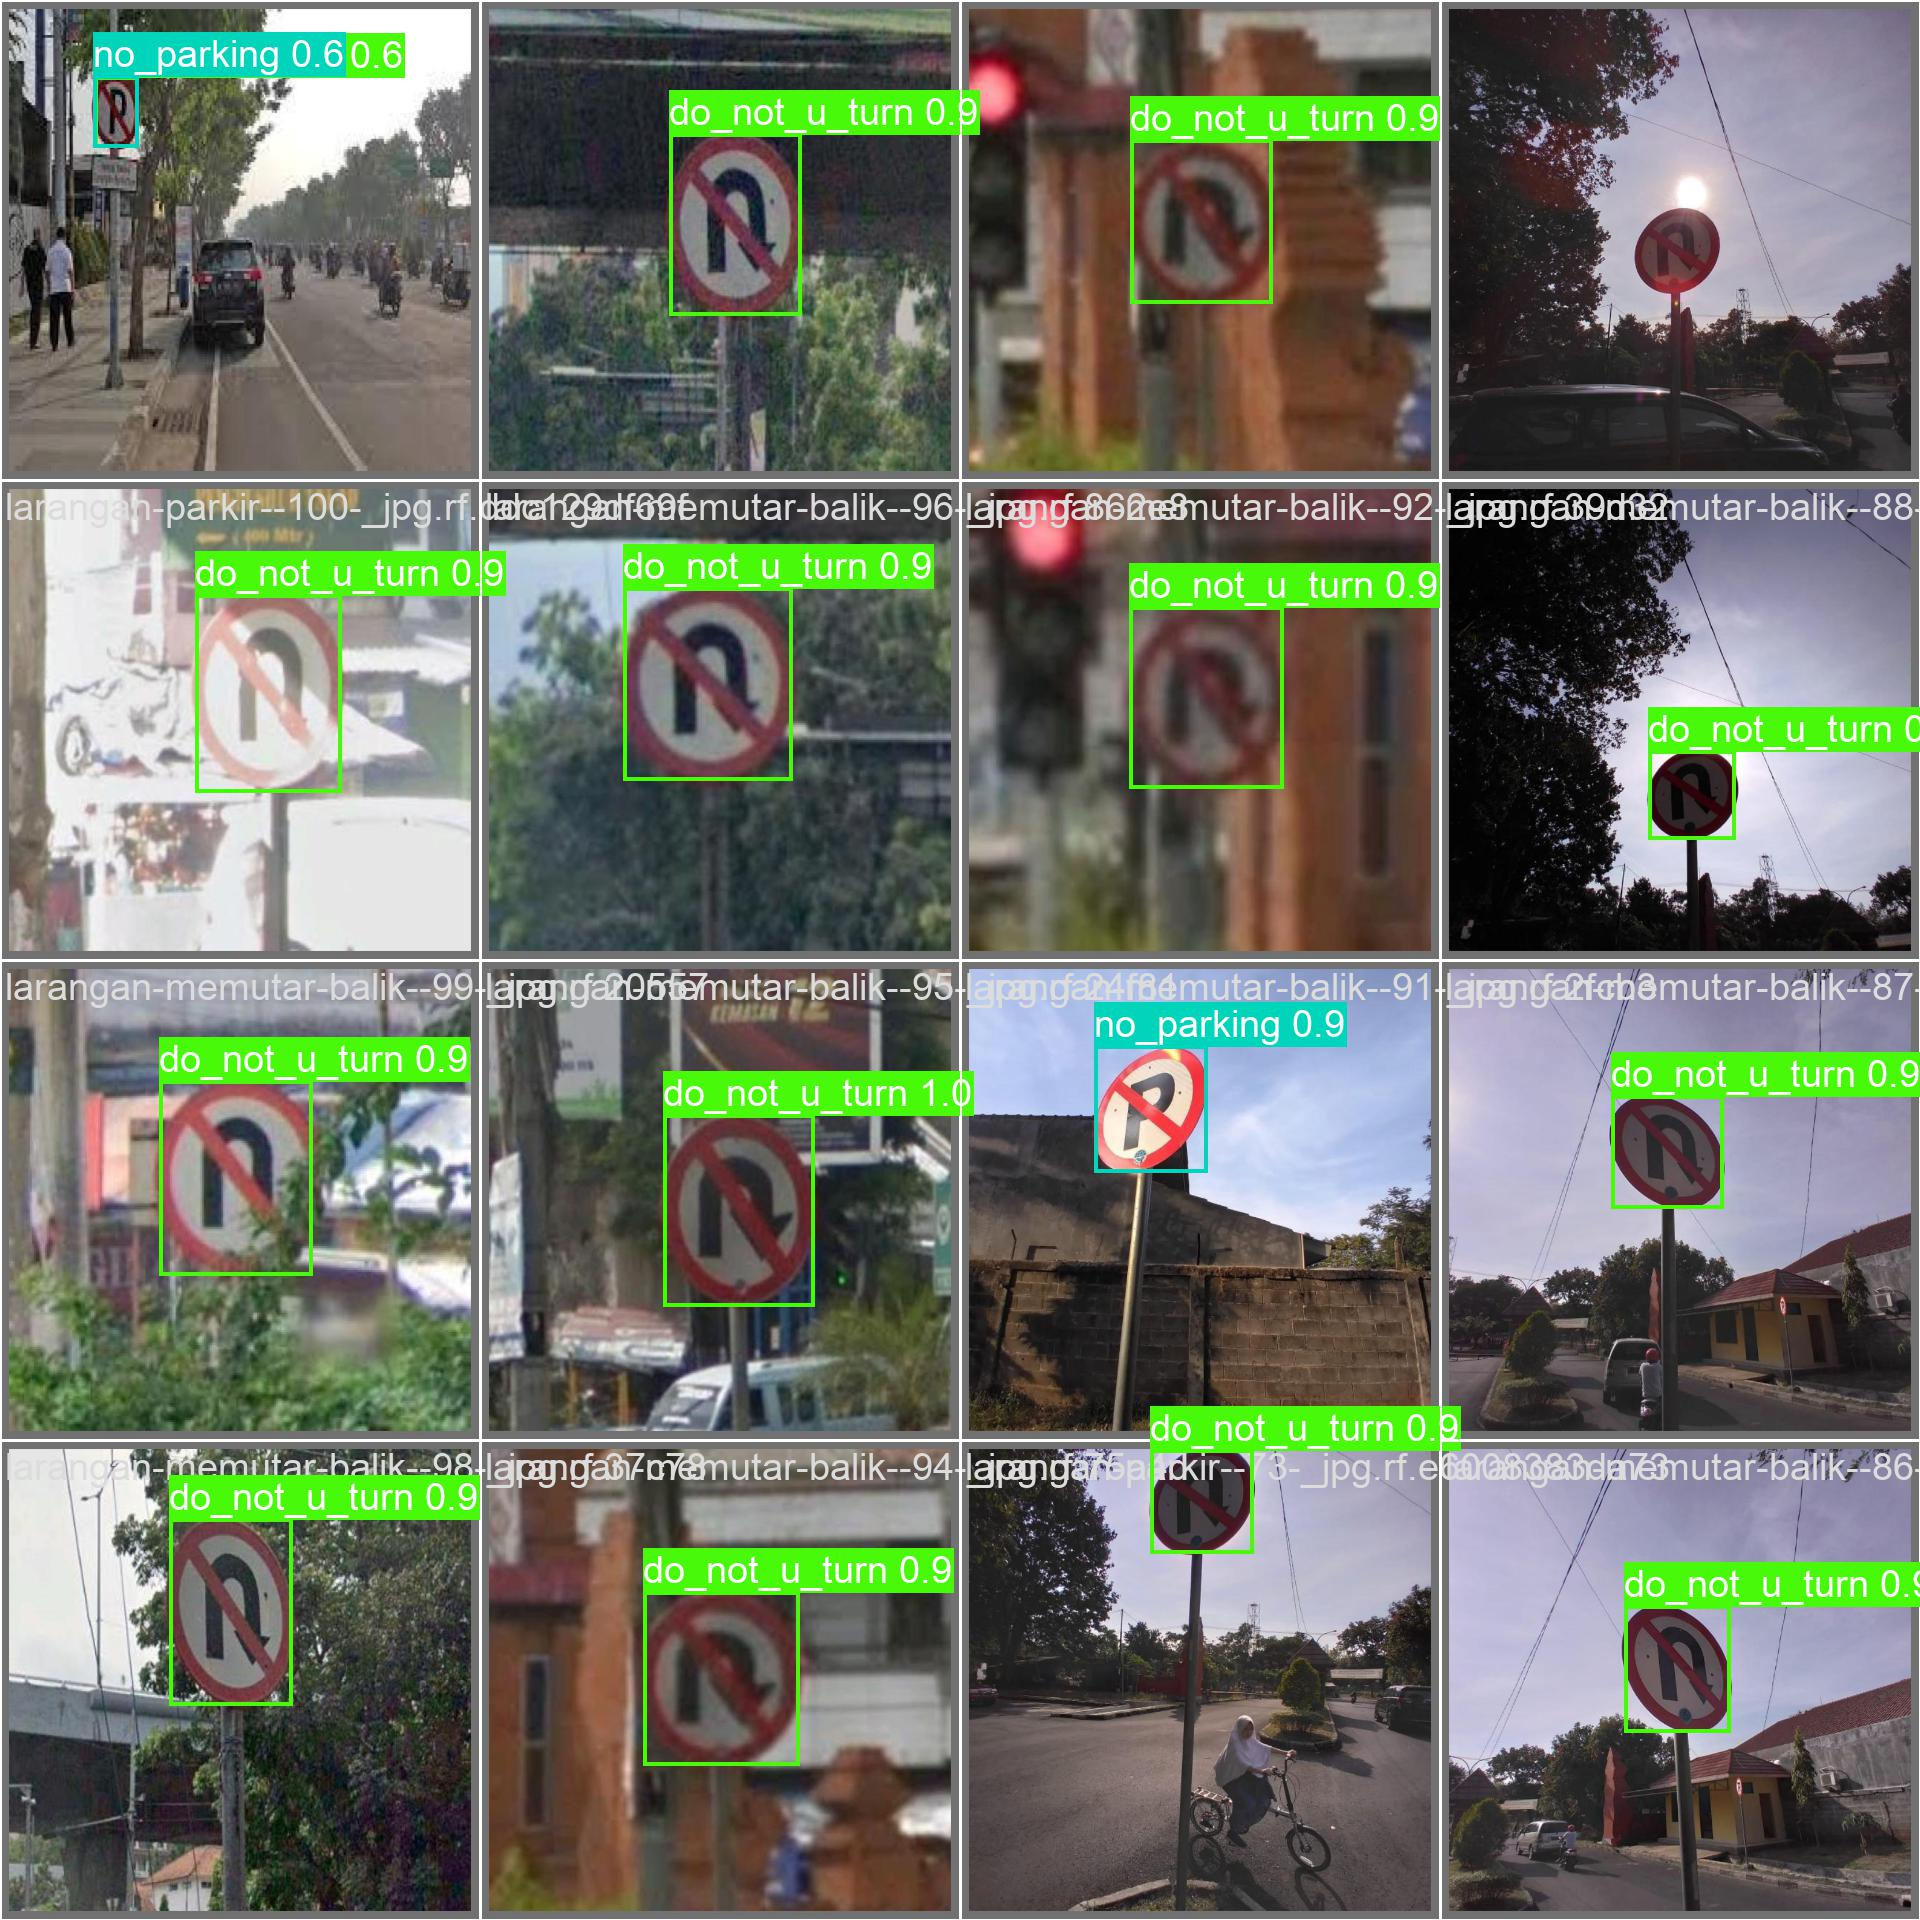

In [ ]:
Image(filename = "runs/detect/train/val_batch2_pred.jpg", height = 500)

##Printing the Training and Validation Loss

/content/drive/MyDrive/TrafficSignDetection


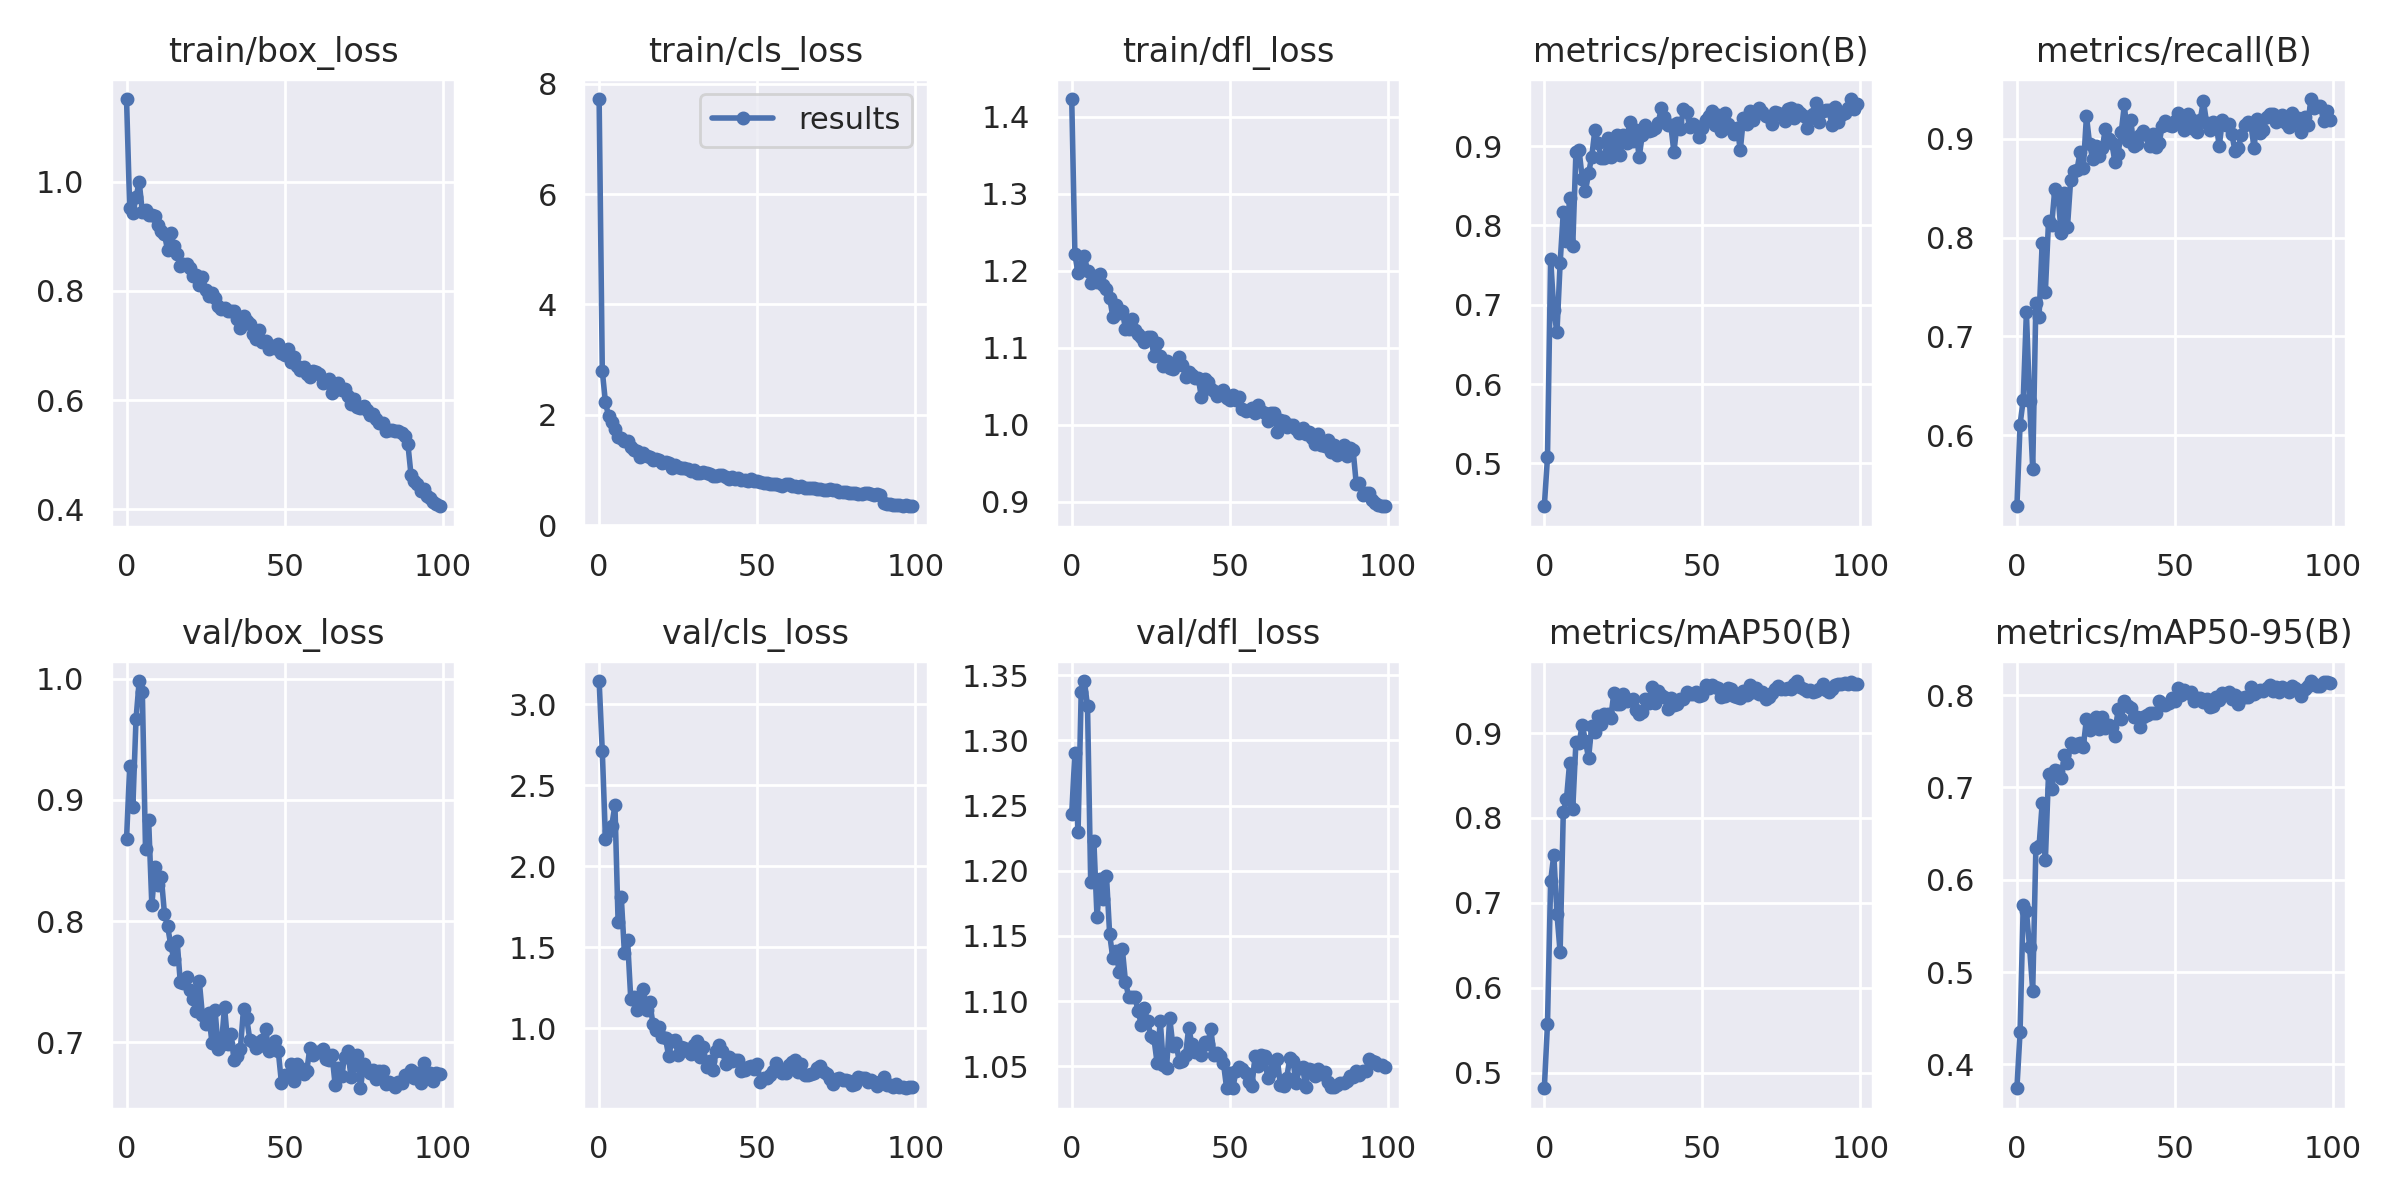

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

##Validate Custom Model

In [ ]:

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


no viable alternative at input '{HOME}'
See https://hydra.cc/docs/1.2/advanced/override_grammar/basic for details

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800


/content/drive/MyDrive/TrafficSignDetection
no viable alternative at input '{dataset.location}'
See https://hydra.cc/docs/1.2/advanced/override_grammar/basic for details

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.


##Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='testtf1.mp4'


/content/drive/MyDrive/TrafficSignDetection
Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 16.9ms
video 1/1 (2/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 15.6ms
video 1/1 (3/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 15.8ms
video 1/1 (4/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 19.3ms
video 1/1 (5/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 15.9ms
video 1/1 (6/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 15.8ms
video 1/1 (7/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 16.7ms
video 1/1 (8/119) /content/drive/MyDrive/TrafficSignDetection/testtf1.mp4: 640x384 16.2ms
video 1/1 (9/119) /content/drive/MyDrive/TrafficSignDetecti

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/drive/MyDrive/TrafficSignDetection/runs/detect/predict8/testtf1.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)